In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
def parser(x):
    return pd.datetime.strptime(x, '%Y-%m')

df = pd.read_csv('air.csv',parse_dates=[0],date_parser=parser)

In [3]:
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [4]:
%matplotlib inline

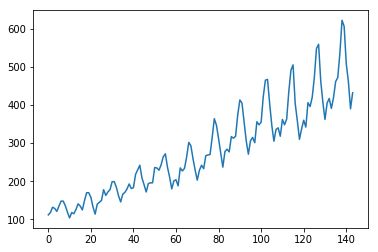

In [5]:
df.Passengers.plot()

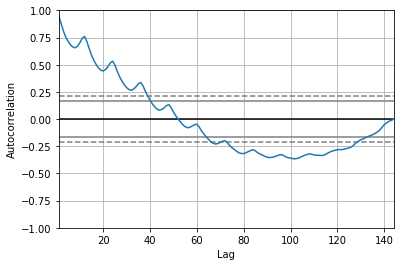

In [6]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.Passengers)


In [7]:
from ARMA import fixed_fit

In [8]:
global model
model = fixed_fit(list(df.Passengers.values))
print(model)

(-0.247579276043759, 1.7053923995649847)


In [9]:
def cal_moving_averages(y):
#calculate ei moving average for each point
    moving_avgs = list()
    for i in range(len(y)):
        e = np.mean(y[:i+1])
        moving_avgs.append(e)
    return moving_avgs

In [10]:
test = list(df.Passengers.values)[-10:]

In [11]:
#model
from sklearn.metrics import mean_squared_error
predictions = list()
y = list(df.Passengers.values)[:-10]
for i in range(10):
    e = cal_moving_averages(y)
    y_n = model[0]*y[-1] + model[1]*e[-1]
    y.append(y_n)
    model = fixed_fit(y)
    predictions.append(y_n)
    print("predicted: ",y_n,"actual: ",test[i])
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted:  354.45096807715635 actual:  419
predicted:  373.18484566498694 actual:  461
predicted:  367.76528150494664 actual:  472
predicted:  371.18064733705955 actual:  535
predicted:  371.3553753500461 actual:  622
predicted:  372.71022132884366 actual:  606
predicted:  373.6267679046407 actual:  508
predicted:  374.69765060368445 actual:  461
predicted:  375.7059375738071 actual:  390
predicted:  376.7311357881244 actual:  432
Test MSE: 19558.981
